# Installation

- `conda install seaborn`
- `pip install seaborn`

## offical website
- [seaborn](https://seaborn.pydata.org/)

you can go there and have a look at the documentation to know what it can do

its very easy and efficient with pandas and matplotlib

# what is seaborn ?
- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. It is built on top of matplotlib and closely integrated with pandas data structures.

In [1]:
# importing seaborn 
import seaborn as sns

Seaborn comes with some built in `datasets` and `themes`.

In [2]:
# loading dataset
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Distplot

Distplot is a `histogram` and `kernel density estimation` plot. It is used to visualize the distribution of data. It takes as input an array and plots a `curve` corresponding to the `distribution of points` in the array.

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


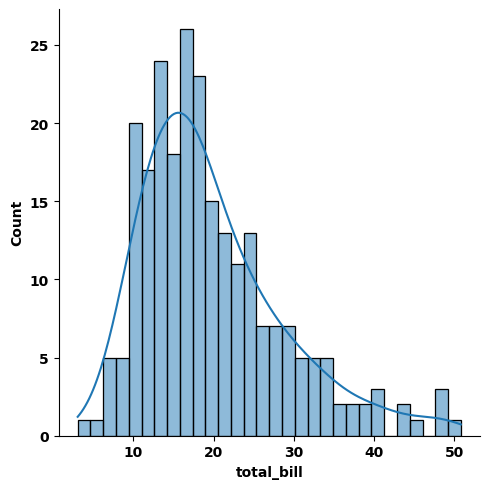

In [4]:
sns.displot(tips['total_bill'], kde=True, bins=30) # kde = kernel density estimation and histogram
#or
sns.histplot(tips['total_bill'], kde=True, bins=30) # kde = kernel density estimation and histogram

# Jointplot
Jointplot is used to visualize the relationship between two variables. It basically plots two distplots for bivariate data. It also shows the `pearson correlation coefficient` between the two variables.

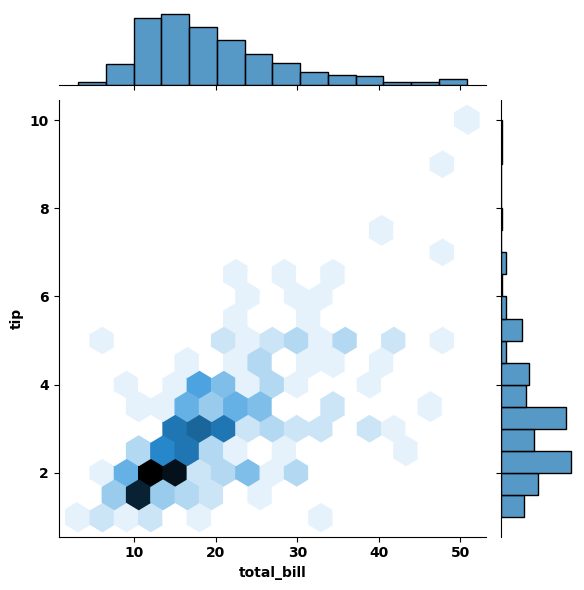

In [5]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex') # hex = hexagonal

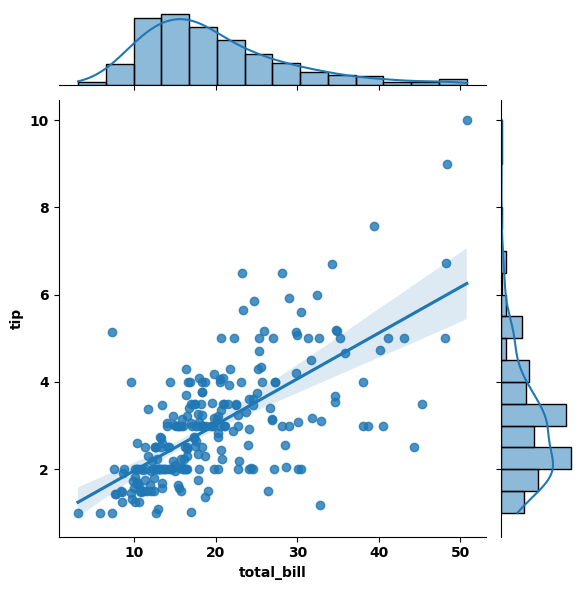

In [6]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')   # reg = regression

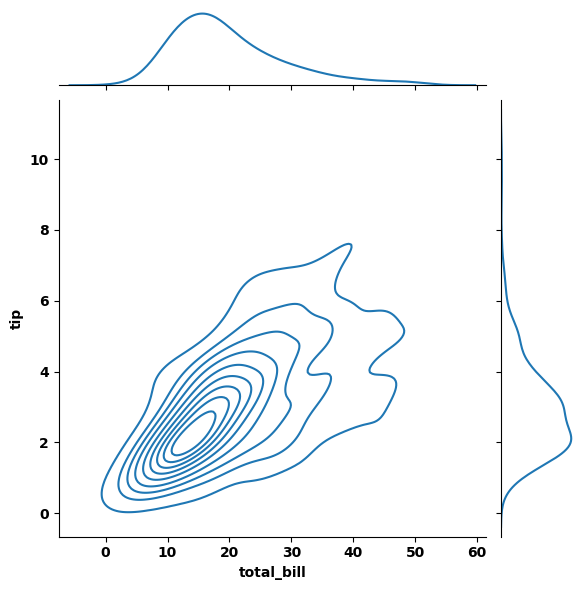

In [7]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')   # kde = kernel density estimation

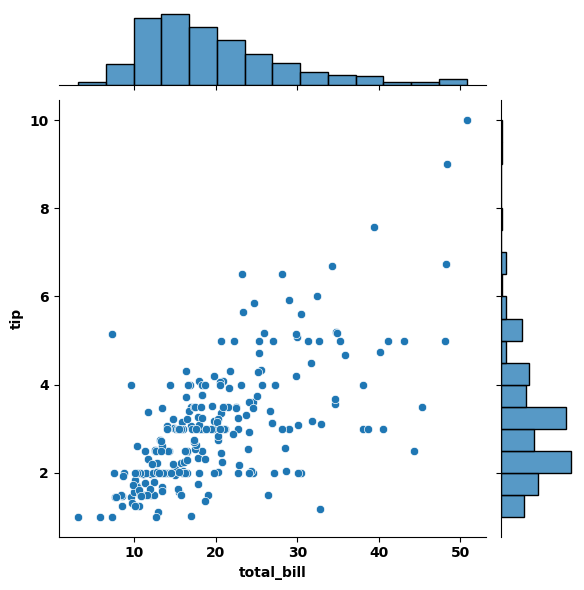

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips,) # default scatter

# Pairplot
`Pairplot` is used to visualize the pairwise relationships between the variables.  It plots the `scatterplot` between every two variables in the dataset and also the `distribution` of each variable in the diagonal axes. It is also called a `scatterplot matrix`.

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


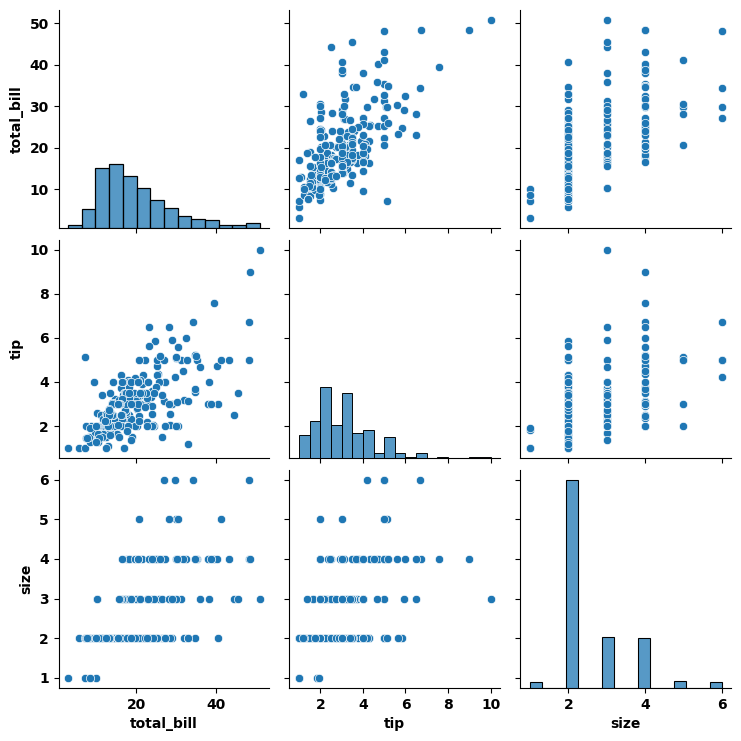

In [9]:
sns.pairplot(tips) # pairplot

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


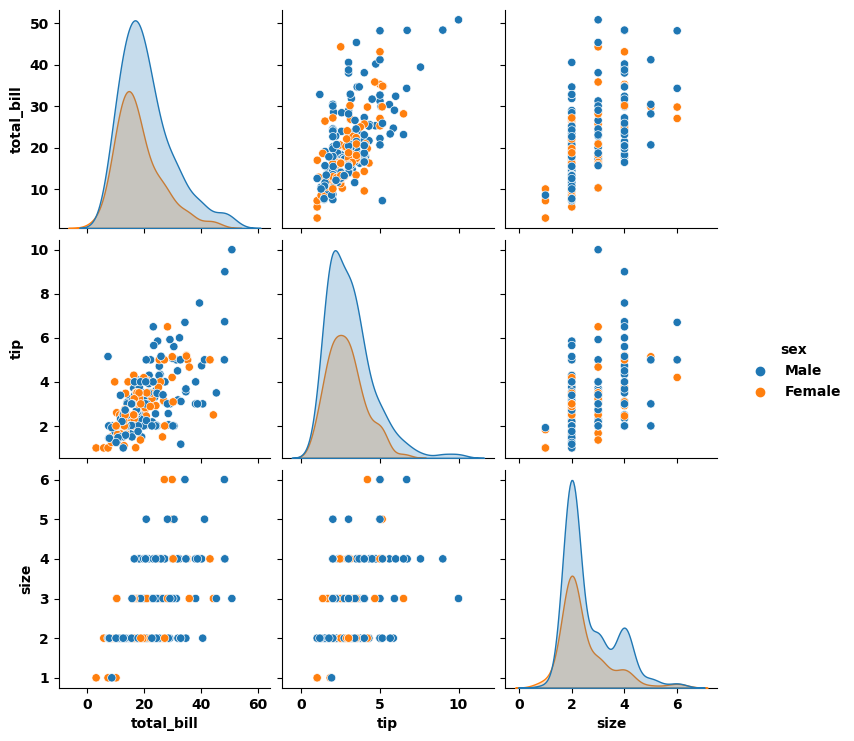

In [10]:
#we can catagorize the data by adding hue
sns.pairplot(tips, hue='sex') # pairplot

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


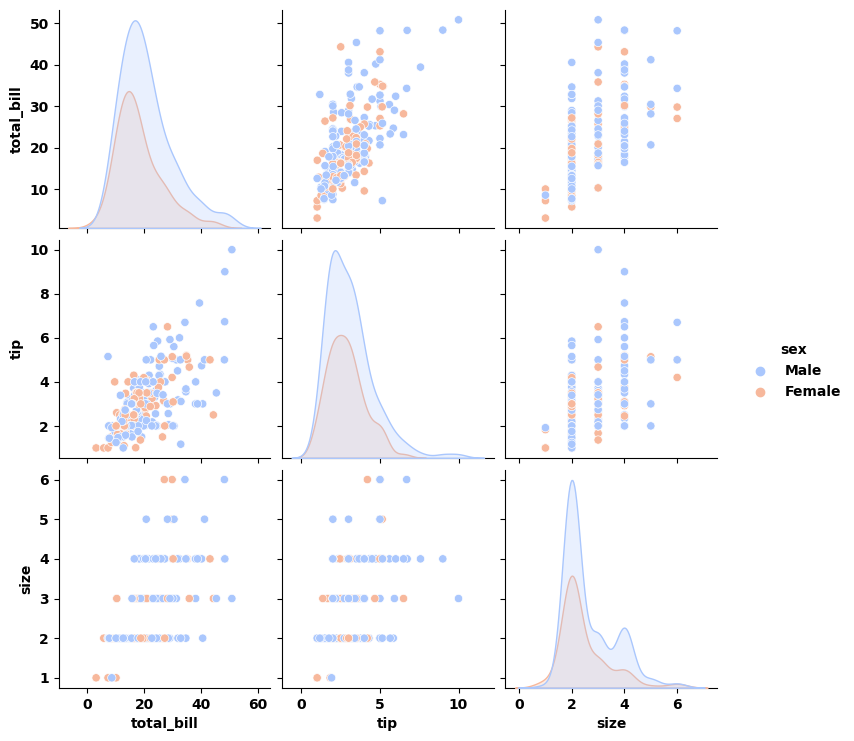

In [11]:
#we can also pass a colore palette to the plot
sns.pairplot(tips, hue='sex', palette='coolwarm') # pairplot

# Rugplot
`Rugplot` is used to visualize the `distribution` of a variable. It draws a dash mark for every point on a univariate distribution. It is the building block of a `kdeplot`. It is also called a `strip plot`.

<Axes: xlabel='total_bill'>

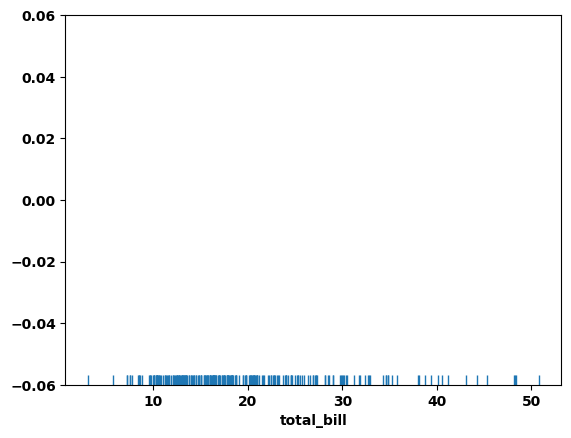

In [12]:
sns.rugplot(tips['total_bill']) # rugplot

A `rugplot` Has some `similarities` with a `histplot` and `kdeplot`. It is a `univariate` plot and it shows the `distribution` of a variable. It is a `1D` representation of a `2D` distribution.

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


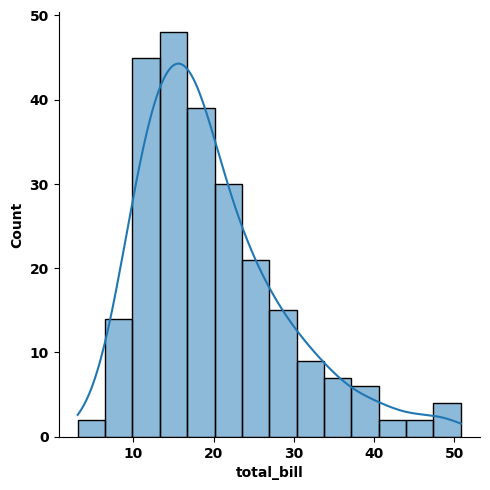

In [15]:
sns.displot(tips['total_bill'], kde=True) # kdeplot

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

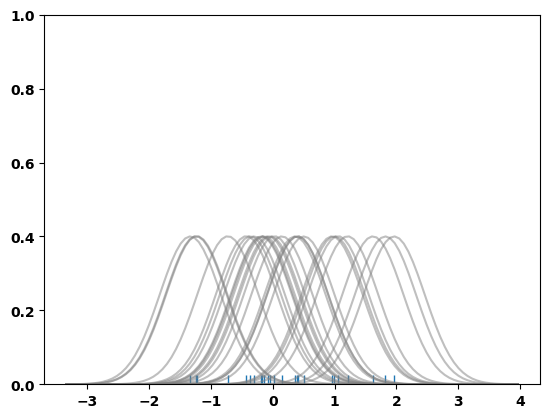

In [16]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

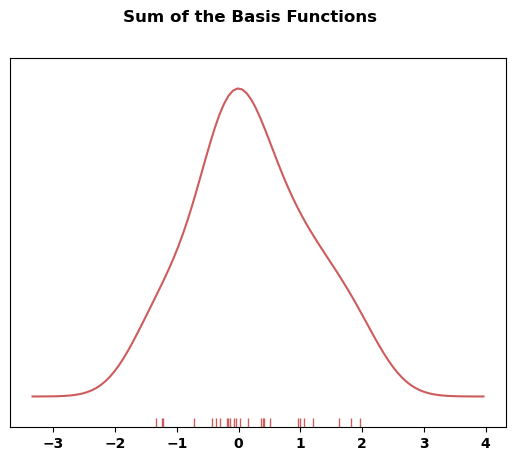

In [17]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

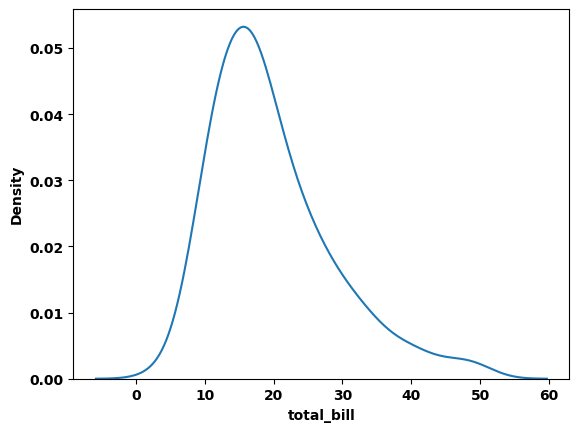

In [18]:
sns.kdeplot(tips['total_bill'])

# Categorical plots

In [19]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# barplot
A `barplot` is a `graph` that shows the `value_counts` of a `categorical` variable. It is a `2D` representation of a `1D` distribution. It is also called a `countplot`. It is the `categorical` equivalent of a `histogram`.

it takes some arguments:
- `x` : the `categorical` variable
- `y` : the `numerical` variable

- `data` : the dataset
etc..

<Axes: xlabel='sex', ylabel='total_bill'>

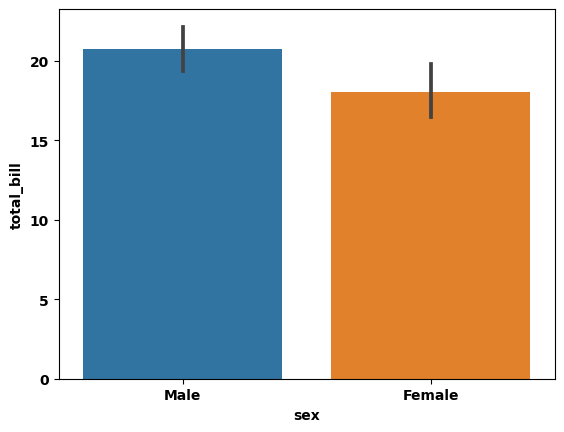

In [21]:
sns.barplot(x='sex', y='total_bill', data=tips)

we can use a agragate function to get the in different categories

<Axes: xlabel='sex', ylabel='total_bill'>

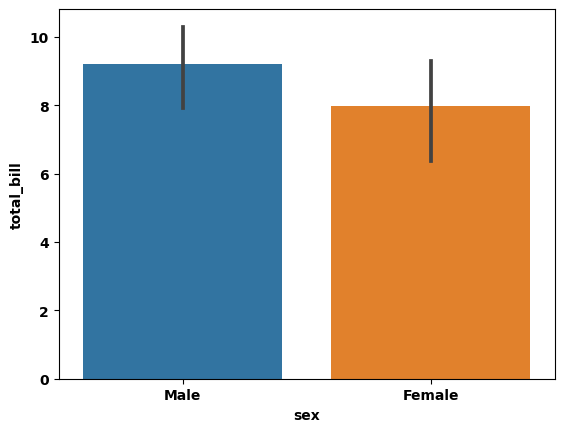

In [23]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

# Countplot
`Countplot` is the `categorical` equivalent of a `histogram`. It is used to visualize the `value_counts` of a `categorical` variable. It is a `barplot` but the `y` axis is `count` instead of `freq`. 

<Axes: xlabel='sex', ylabel='count'>

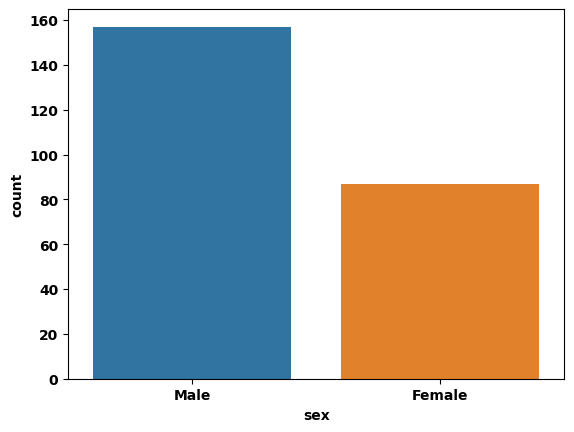

In [24]:
sns.countplot(x='sex', data=tips)

# boxplot 

`boxplot` gives a `summary` of the `distribution` of a `numerical` variable. Meaning it shows the `minimum`, `first quartile`, `median`, `third quartile`, and `maximum` of a `numerical` variable.

<Axes: xlabel='day', ylabel='total_bill'>

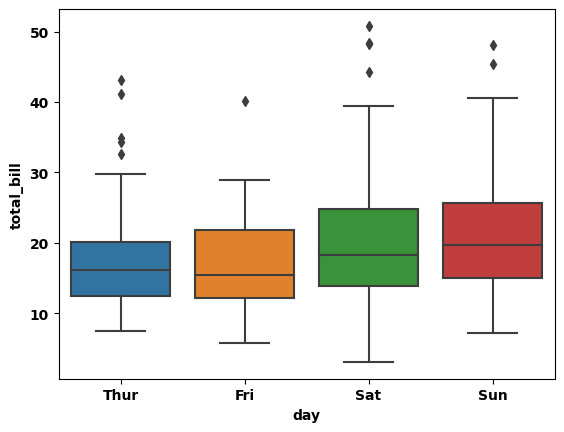

In [25]:
sns.boxplot(x='day', y='total_bill', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

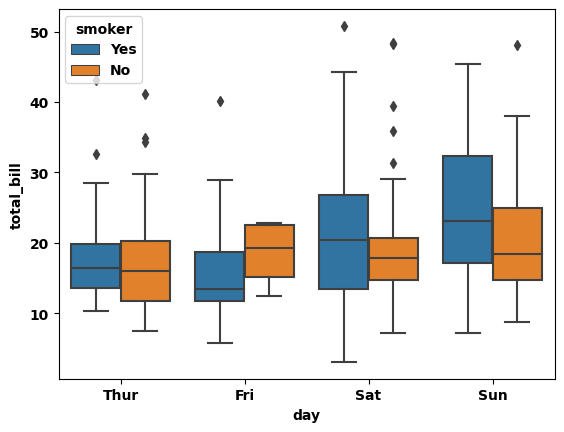

In [26]:
sns.boxplot(x='day', y='total_bill', data=tips, hue="smoker") # smoker based catagorization

# Violinplot
Violinplot is a `graph` close to the box plot but it shows the distribution of a `numerical` variable by a `kernel density estimation` approximation.

<Axes: xlabel='day', ylabel='total_bill'>

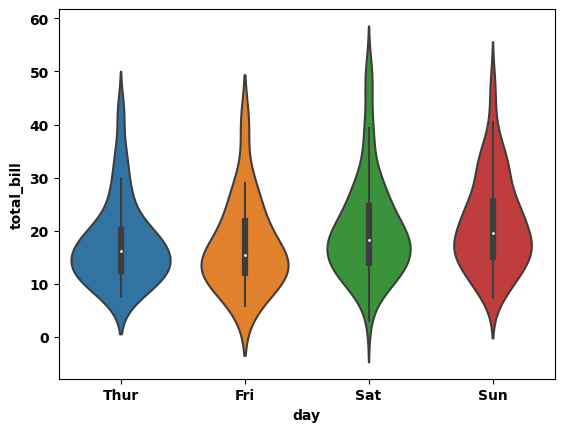

In [27]:
sns.violinplot(x='day', y='total_bill', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

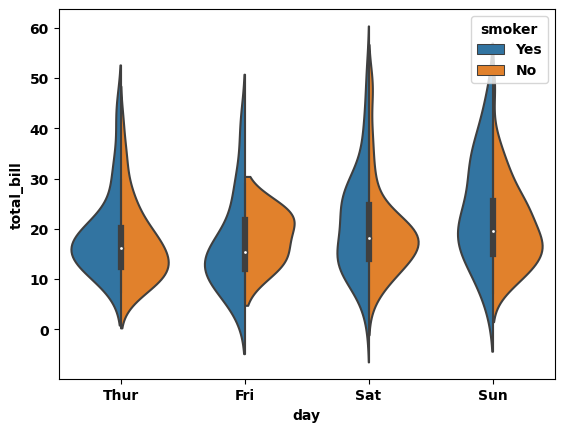

In [30]:
sns.violinplot (x='day', y='total_bill', data=tips, hue='smoker', split=True)
# catgorization of the total bills by day and smoker. The smoker is catagorized as 0 and 1 and the smoker catagorization is marged togather which gives a lot of information

# Stripplot

<Axes: xlabel='day', ylabel='total_bill'>

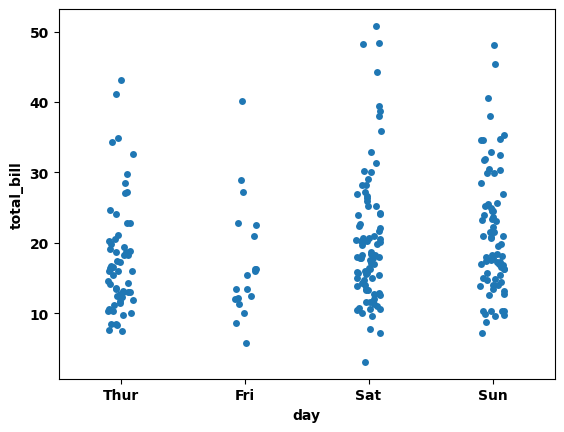

In [35]:
sns.stripplot(x='day', y='total_bill', data=tips,)

<Axes: xlabel='day', ylabel='total_bill'>

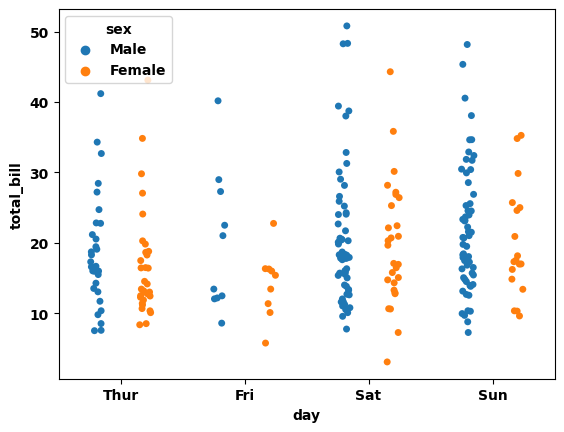

In [40]:
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex', dodge=True) # dodge make the hue catagorization split, so we can see the catagorization clearly/

# Swarmplot
Combine a `stripplot` and a `violinplot` to get a `swarmplot`. It shows the `distribution` of a `numerical` variable for different `categories`. It is a `categorical` equivalent of a `kdeplot`.

<Axes: xlabel='day', ylabel='total_bill'>

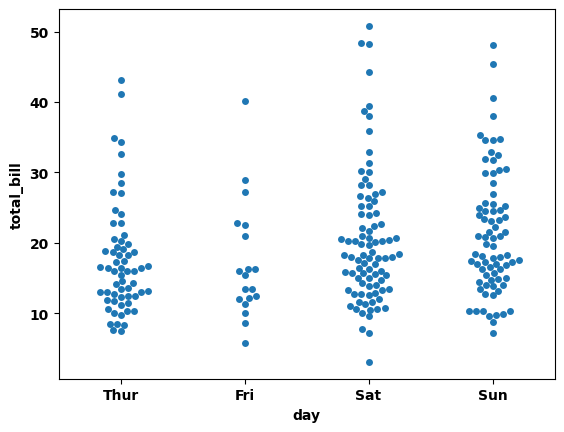

In [41]:
sns.swarmplot(x='day', y='total_bill', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

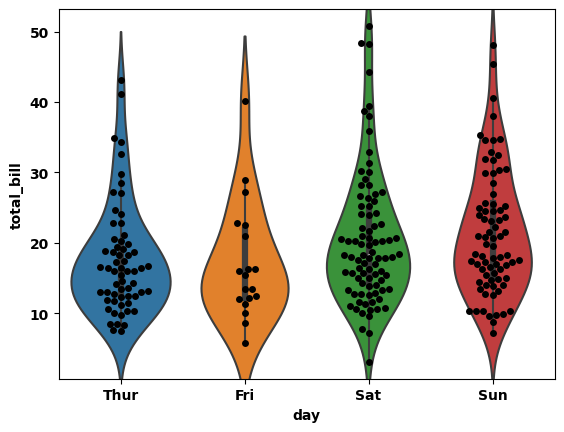

In [42]:
# similarity between the two catagorizations
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

There is a plot called `factorplot` which is a `general` plot that can be used to draw `categorical` plots. It can be used to draw `barplots`, `countplots`, `boxplots`, `violinplots`, `swarmplots`, etc. It is a `general` plot that can be used to draw `categorical` plots.

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


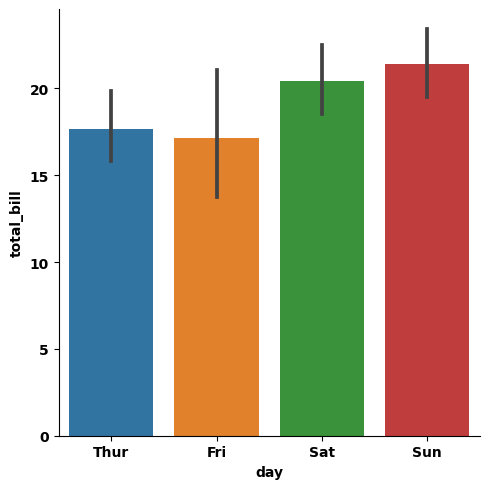

In [47]:
sns.catplot(x='day', y='total_bill', data=tips, kind='bar')

c:\Users\Rishat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


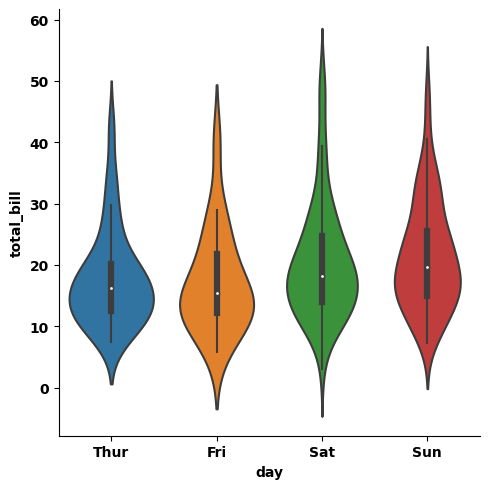

In [48]:
sns.catplot(x='day', y='total_bill', data=tips, kind='violin')